In [74]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [75]:
def build_fig(title="", axis_off=False, size=(5, 5), 
              y_lab="", x_lab="", title_size=15, dpi=300):
    """A function to build a matplotlib figure. Primary
    goal is to sandardize the easy stuff.
    Args:
        - title (str): the title of the plot
        - axis_off (bool): should the axis be printed?
        - size (tuple): how big should the plot be?
        - y_lab (str): y axis label
        - x_lab (str): x axis label
    Returns:
        fig (plt.figure)
    """
    fig = plt.figure(figsize=size, 
                     facecolor='w',
                     dpi=dpi)
    fig.suptitle(title, fontsize=title_size)
    plt.xlabel(x_lab, fontsize=title_size)
    plt.ylabel(y_lab, fontsize=title_size)
    
    if axis_off:
        plt.axis('off')
    return fig

In [76]:
%%time
DIR_PATH = '/Volumes/Cooper_TB_Drive/research/readmissions/tile_files/'

maps = {}
lens = []

for file in os.listdir(DIR_PATH):
    if 'csv' in file:
        county = file.split("_")[0]
        full_path = f"{DIR_PATH}{file}"
        frame = pd.read_csv(full_path)
        lens.append(len(frame))

        maps[county] = {
            'path':full_path,
            'df':frame
        }

print(np.sum(lens))

55360
CPU times: user 120 ms, sys: 25 ms, total: 145 ms
Wall time: 164 ms


In [77]:
%%time
rnd_county = np.random.choice(list(maps.keys()), 1)[0]
rnd_county

sample_row = maps[rnd_county]['df'].sample(1)

for idx, row in sample_row.iterrows():
    file_to_get = f"{DIR_PATH}{row['chunk_file']}_{row['county']}_tiles.npy"
    print(file_to_get)

    tmp = np.load(file_to_get, mmap_mode='r')
    print(tmp.shape)



/Volumes/Cooper_TB_Drive/research/readmissions/tile_files/4_Washtenaw_tiles.npy
(1000, 3, 1000, 1000)
CPU times: user 4.8 ms, sys: 3.15 ms, total: 7.95 ms
Wall time: 370 ms


In [78]:
sample_row.T

,3674
image_index,3674
latitiude,42.2045
longitude,-83.6823
projection,EPSG:2898
resolution,"(2.0, 2.0)"
metadata,"{'driver': 'GTiff', 'dtype': 'uint8', 'nodata'..."
county,Washtenaw
window_size,1000
chunk_file,4


In [79]:
sample_row['image_index'].values[0]

3674

In [80]:
raw_idx = sample_row['image_index'].values[0]
img_idx = raw_idx - ((sample_row['chunk_file'].values[0]-1) * 1000)
img = tmp[img_idx, :, :, :]
img.shape

(3, 1000, 1000)

Washtenaw
42.20452174575431 -83.68230793774812


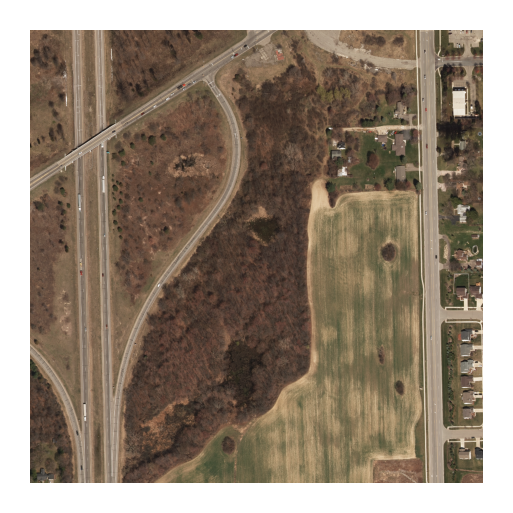

In [81]:
print(sample_row['county'].values[0])
print(sample_row['latitiude'].values[0], sample_row['longitude'].values[0])

fig = build_fig(size=(2,2), axis_off=True)
plt.imshow(np.moveaxis(img, 0, 2))